In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
soumya069_dataset_path = kagglehub.dataset_download('soumya069/dataset')

print('Data source import complete.')


In [ ]:
!pip install transformers==<4.57.1>

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install --upgrade transformers

In [14]:
import pandas as pd
import transformers
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForMaskedLM,Trainer, TrainingArguments
from transformers import EarlyStoppingCallback

d:\final_proj\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
fake_df=pd.read_csv("/kaggle/input/dataset/Fake.csv")

In [ ]:
fake_df.shape

(23481, 4)

In [ ]:
fake_df['label']="fake"

In [ ]:
fake_df.sample(5)

,title,text,subject,date,label
21020,12 MUSLIM MIGRANTS GANG RAPE 13 YR OLD GIRL…Mu...,"Tell us again Barack, about the poor widows a...",left-news,"Feb 9, 2016",fake
10227,MEET “LYIN’ LIZZIE”: Why Was Obama’s AG LORETT...,More bad news for Lyin Loretta or Lyin Lizzi...,politics,"Aug 5, 2017",fake
5816,Fox Host: Don’t Ban Assault Weapons Because T...,Fox News host Tucker Carlson is so desperate t...,News,"June 19, 2016",fake
11909,NAACP DEMANDS An Apology From Trump For Tellin...,The Hill reported:The NAACP President Cornell ...,politics,"Jan 14, 2017",fake
7502,Watch Cruz Insanely Admit He’ll Still Back Tr...,The Republican race towards the White House is...,News,"March 14, 2016",fake


In [ ]:
true_df=pd.read_csv("/kaggle/input/dataset/True.csv")
true_df.shape

(21417, 4)

In [ ]:
true_df['label']="true"

In [ ]:
true_df.sample(5)

,title,text,subject,date,label
1229,Republican Senator Collins likely 'yes' vote t...,WASHINGTON (Reuters) - U.S. Republican Senator...,politicsNews,"October 15, 2017",true
5851,U.S. diplomats circulate memo critical of immi...,WASHINGTON (Reuters) - U.S. State Department o...,politicsNews,"January 30, 2017",true
20412,Suicide bomber attacks NATO convoy in Afghanis...,KABUL (Reuters) - A suicide bomber in an explo...,worldnews,"September 11, 2017",true
13119,London security alert ends as package ruled no...,LONDON (Reuters) - London police said an item ...,worldnews,"December 5, 2017",true
14950,Iran sticks to key limits of nuclear deal: U.N...,VIENNA (Reuters) - Iran has remained within th...,worldnews,"November 13, 2017",true


In [ ]:
df=pd.concat([true_df,fake_df])

In [ ]:
df.shape

(44898, 5)

In [ ]:
df.sample(5)

,title,text,subject,date,label
11981,Italian politicians up in arms over Austria pa...,ROME (Reuters) - Italian politicians denounced...,worldnews,"December 18, 2017",true
906,Angela Merkel’s Husband Is Taking Melania And...,While spouses are a tradition at the G-20 Summ...,News,"July 7, 2017",fake
1087,New Hampshire governor asks Trump to stop Indo...,BOSTON (Reuters) - New Hampshire Governor Chri...,politicsNews,"October 23, 2017",true
2540,Impact of firing Sessions could be troublesome...,(Reuters) - President Donald Trump could trigg...,politicsNews,"July 25, 2017",true
11313,Russia's Putin registers re-election bid,MOSCOW (Reuters) - President Vladimir Putin fo...,worldnews,"December 27, 2017",true


In [ ]:
print("NULL values-->",df.isnull().sum())
print("Duplicated values-->",df.duplicated().sum())

NULL values--> title      0
text       0
subject    0
date       0
label      0
dtype: int64
Duplicated values--> 209


In [ ]:
df.iloc[0]

text     washington (reuters) - the head of a conservat...
label                                                    1
Name: 0, dtype: object

In [ ]:
df['label'].value_counts() #balanced dataset hai

label
fake    23481
true    21417
Name: count, dtype: int64

In [ ]:
df.groupby('label')['subject'].value_counts()

label  subject        
fake   News                9050
       politics            6841
       left-news           4459
       Government News     1570
       US_News              783
       Middle-east          778
true   politicsNews       11272
       worldnews          10145
Name: count, dtype: int64

In [ ]:
print("text->",df.iloc[0]['text'])
print("title->",df.iloc[0]['title'])

text-> WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support 

In [ ]:
#unneccessary columns-> title,subject,date
df.drop(['title','subject','date'],axis=1,inplace=True)


In [ ]:
df.sample(5)

,text,label
8802,washington (reuters) - democrat baron hill on ...,1
16709,mitch mcconnell just made a statement on the s...,0
18016,"bosaso, somalia (reuters) - islamist al shabaa...",1
13756,hillary clinton was all smiles at a rally in c...,0
13749,the article below is from politico this arti...,0


In [ ]:
df['text'].str.len().sort_values(ascending=False)

23086    51794
22303    51794
9731     49705
17849    49705
21978    48835
         ...  
11247        1
11249        1
11267        1
21237        1
11335        1
Name: text, Length: 44898, dtype: int64

In [ ]:
df['label']=df['label'].map({'fake':0,"true":1})

In [ ]:
df['text']=df['text'].str.lower()

In [15]:
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(35918,)

In [27]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model_ckpt="microsoft/deberta-v3-base"

tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [18]:
from transformers import AutoModelForSequenceClassification

In [ ]:
model_bigbird=AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=2).to(device)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print("model_max_length:", tokenizer.model_max_length)

model_max_length: 1000000000000000019884624838656


In [ ]:
train_enc = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
val_enc = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

In [ ]:
from torch.utils.data import Dataset

class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_length
        )
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
train_dataset = NewsDataset(X_train, y_train, tokenizer)
val_dataset = NewsDataset(X_test, y_test, tokenizer)


In [ ]:
train_dataset[1]

{'input_ids': tensor([     1,  47136,    287,    368,  29537,    268,    285,    341,    262,
           1840,    265,    262,  33693,   4438,   1550,   2834,   1824,   1034,
           1603,    281,    379,    878,    264,   8869,    291,    542,    262,
            907,   4543,    293,    308,   2785,  39288,    275, 100681,    263,
            825,    264,    266,    567,   3138,    265,   5323,   3496,    261,
            266,  12771,  11820,   1271,    357,    277,  72658,    260,  20108,
           1840,    281,    823,    991,    264,   3128,    277,  31798,    272,
           4172,   2201,    303,    331,    412,    277,    262,   1335,    265,
           3063,    261,    262,  24518,  42784,   5508,   2152,    263,    262,
          77919,   3049,    264,   1052,   6800,    264,    825,    264,    262,
            498,   3138,    260,    262,  20108,   2666,   2527,    437,    542,
            272,   1840,   8869,    262,    564,    265,   1463,   3496,    260,
              2

In [ ]:
training_args = TrainingArguments(
    output_dir="./bert_fake_news_results",
    eval_strategy="epoch",
    eval_steps=500,
    save_strategy="epoch",
    save_steps=500,
    load_best_model_at_end=True,
    num_train_epochs=4,

    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_ratio=0.1,
    logging_dir="./logs",
    fp16=True,
    report_to="none",
    logging_steps=100,
)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

In [ ]:
trainer = Trainer(
    model=model_bigbird,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)


In [ ]:
trainer.train()

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.000000,0.000000,1.000000
2,0.025200,0.000000,1.000000
3,0.000000,0.013103,0.999443
4,0.000000,0.005302,0.999777


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=17960, training_loss=0.0111278116280442, metrics={'train_runtime': 14806.9838, 'train_samples_per_second': 9.703, 'train_steps_per_second': 1.213, 'total_flos': 3.780236947523174e+16, 'train_loss': 0.0111278116280442, 'epoch': 4.0})

In [ ]:
model_bigbird.save_pretrained("fk_new_dect_model")

In [ ]:
tokenizer.save_pretrained("fk_news_dect_tokenizer")

('fk_news_dect_tokenizer/tokenizer_config.json',
 'fk_news_dect_tokenizer/special_tokens_map.json',
 'fk_news_dect_tokenizer/spm.model',
 'fk_news_dect_tokenizer/added_tokens.json',
 'fk_news_dect_tokenizer/tokenizer.json')

In [ ]:
model_bigbird.eval()

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Layer

In [ ]:
from transformers import pipeline

In [ ]:
text="""WASHINGTON (Reuters) -
The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt
to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp
pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on
federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday,
lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy,
even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress.
President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional
increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure,
public health and environmental protection. “The (Trump) administration has already been willing to say:
‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows,
chairman of the small but influential House Freedom Caucus, said on the program.
“Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent.
For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said.
Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the
federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt.
“It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS.
Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations,
to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed
in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said.
Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth.
House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that
welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance,
“entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled,
as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid."""

In [ ]:
device

'cuda'

In [ ]:
text1="""donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump (@realdonaldtrump) december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of decency won t even allow him to rise above the gutter long enough to wish the american citizens a happy new year!  bishop talbert swan (@talbertswan) december 31, 2017no one likes you  calvin (@calvinstowell) december 31, 2017your impeachment would make 2018 a great year for america, but i ll also accept regaining control of congress.  miranda yaver (@mirandayaver) december 31, 2017do you hear yourself talk? when you have to include that many people that hate you you have to wonder? why do the they all hate me?  alan sandoval (@alansandoval13) december 31, 2017who uses the word haters in a new years wish??  marlene (@marlene399) december 31, 2017you can t just say happy new year?  koren pollitt (@korencarpenter) december 31, 2017here s trump s new year s eve tweet from 2016.happy new year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. love!  donald j. trump (@realdonaldtrump) december 31, 2016this is nothing new for trump. he s been doing this for years.trump has directed messages to his  enemies  and  haters  for new year s, easter, thanksgiving, and the anniversary of 9/11. pic.twitter.com/4fpae2kypa  daniel dale (@ddale8) december 31, 2017trump s holiday tweets are clearly not presidential.how long did he work at hallmark before becoming president?  steven goodine (@sgoodine) december 31, 2017he s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  roy schulze (@thbthttt) december 31, 2017who, apart from a teenager uses the term haters?  wendy (@wendywhistles) december 31, 2017he s a fucking 5 year old  who knows (@rainyday80) december 31, 2017so, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.photo by andrew burton/getty images."""

In [ ]:
import torch.nn.functional as F

In [ ]:
inputs = tokenizer(text1, return_tensors="pt", truncation=True, padding=True, max_length=256)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model_bigbird(**inputs)
    logits = outputs.logits
    probs = F.softmax(logits, dim=1)
    predicted_class_id = torch.argmax(probs, dim=1).item()
    confidence = probs[0][predicted_class_id].item()


labels = ["Fake","true"]
predicted_label = labels[predicted_class_id]

print(f"Prediction: {predicted_label} ({confidence*100:.2f}% confidence)")

Prediction: Fake (100.00% confidence)


In [ ]:
df[df['label']==0].iloc[0]['text']

'donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump (@realdonaldtrump) december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of decency won t ev

In [7]:
import os
import pandas as pd

In [2]:
%pwd

'd:\\final_proj'

In [6]:
from artificats import model1,tokenizer1

In [21]:
model=AutoModelForSequenceClassification.from_pretrained("artificats\model1")
tokenizer=AutoTokenizer.from_pretrained("artificats/tokenizer1")

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\soumy\AppData\Local\Temp\ipykernel_596\768554687.py:1: SyntaxWarning: invalid escape sequence '\m'
  model=AutoModelForSequenceClassification.from_pretrained("artificats\model1")


In [16]:
X_test.shape

(8980,)

In [17]:
preds=[]

In [ ]:
%pip install seaborn

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt


In [28]:
for i in range(X_test.shape[0]):
    inputs = tokenizer(X_test.iloc[i], return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class_id = torch.argmax(logits, dim=1).item()
    
    preds.append(predicted_class_id)



In [29]:
print(classification_report(y_test, preds, target_names=['Fake', 'True']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4733
        True       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



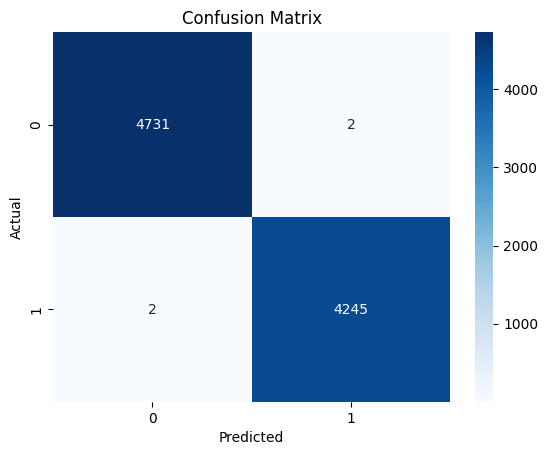

In [30]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()